<a href="https://colab.research.google.com/github/henriqueborgo/Solved_Cases/blob/main/Case_2_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 2 - Walmart

## Business understanding

### Business overview


Walmart, Inc., is an American multinational grocery store
Department.
The company was founded by Sam Walton in 1962, incorporated on
October 1969 and listed on the New York Stock Exchange in 1972.

In the year 2021, it made a profit of $13.51 Billion.
Being one of the main retail stores in the world, the data includes
weekly sales from 45 stores across the United States.
Walmart runs several discount promotional events throughout the year.
year.
These markdowns precede major holidays, the four major
everyone, which is the Super Bowl, Labor Day, Thanksgiving and
Christmas.
Weeks that include these holidays carry greater weight.

### Goals and developments of the study

To carry out an information survey about the revenue of the stores in USA and point wich store would be better to expand the size.

### Business Success Criteria

The projet will be a success if there is a store that worth it to invest on expansio


### Libraries upload and dataset loading

In [ ]:
# Libraries upload

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from ipywidgets import interact

In [ ]:
# Data upload
# Dataset available in: : https://www.kaggle.com/yasserh/walmart-dataset

walmart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEX/Cases_Resolvidos/Walmart.csv')


## Data Understanding



### Available Data

- **Store** - ID Store
- **Date** - Week of the sale
- *Weekly_Sales** - Amount of sale on the week
- **Holiday_Flag** Flag - (1 - Holiday Week 0 - Non-Holiday Week)
- **Temperature** - in °F
- **Fuel_Price** - Price of gas in the region of store
- **CPI** - Customer price index
- **Unemployment** - Unemployment ratio

### Useful information

- Holiday - Events Week
- Super Bowl - 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labour Day - 10-Sep-10, 09-Sep-11, 07-Sep-12
- Thanksgiving - 26-Nov-10, 25-Nov-11, 23-Nov-12
- Christmas - 31-Dec-10, 30-Dec-11, 28-Dec-12

The data it's easy to understand. 



In [ ]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- Reading the dataset info, it's possible to see that there's no missing values.
- The date may be coverted to datetime
- Holiday flag may be converted in category
- The titles area easy to understand, not necessary to change
- CPI: An index that measures the monthly change in prices paid by U.S. consumers, based on a weight average of prices for a basket of goods and services representative of aggregated U.S. consumers spending. Source: [investopedia](https://www.investopedia.com/terms/c/consumerpriceindex.asp)

## Data Preparation and Modeling

For this step were used the following technics:

- filtering and sorting
- detection of outliers
- descriptive and inferential statistics
- data treatment
- data visualization 

### Filtering and sorting

In [ ]:
# Converting the Date from object to datetime
# Converting the Holiday_Flag and from Store fromint64 to category
# Removing the scienctific notation of the Weekly_Sales column
# Modifying the date to %Y-%M format

walmart['Date'] = pd.to_datetime(walmart['Date'], errors='ignore')
walmart['Date'] = walmart['Date'].dt.strftime('%Y-%m')
#walmart['Date'] = pd.to_datetime(walmart['Date'],errors='ignore')
walmart['Holiday_Flag'] = walmart['Holiday_Flag'].astype('category')
walmart['Store'] = walmart['Store'].astype('category')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
display(walmart['Date'])

0       2010-05
1       2010-12
2       2010-02
3       2010-02
4       2010-05
         ...   
6430    2012-09
6431    2012-05
6432    2012-12
6433    2012-10
6434    2012-10
Name: Date, Length: 6435, dtype: object

In [ ]:
# Verifying the modified values

walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Weekly_Sales  6435 non-null   float64 
 3   Holiday_Flag  6435 non-null   category
 4   Temperature   6435 non-null   float64 
 5   Fuel_Price    6435 non-null   float64 
 6   CPI           6435 non-null   float64 
 7   Unemployment  6435 non-null   float64 
dtypes: category(2), float64(5), object(1)
memory usage: 315.9+ KB


In [ ]:
# Verifying if all stores have the same amount of data

walmart_stores = walmart.groupby(['Date'])['Store'].count().reset_index()
walmart_stores.describe()

,Store
count,36.00
mean,178.75
std,56.40
min,45.00
25%,168.75
50%,180.00
75%,225.00
max,270.00


It's possible to see that there is the same amount of data in each of the 45 stores

### Detection of Outliers

In [ ]:
# Dropping 10/Jan and 12/Nov/Dez data (low grouped sales in month - outlier)

exclude_dates = ['2010-01','2012-11','2012-12']
walmart = walmart[walmart.isin(exclude_dates) == False]

In [ ]:
# Dropping Store 3, 5, 30, 33, 36, 37, 38, 42, 43, 44 (low weekly sales - no high outliers)
# 

exclude_stores = [3, 5, 30, 33, 36, 37, 38, 42, 43, 44]
walmart = walmart[walmart['Store'].isin(exclude_stores) == False]

In [ ]:
# Outliers of Weekly_Sales

fig_1 = px.box(walmart, x="Store", y="Weekly_Sales", notched=True)
fig_1.show()

In [ ]:
# Outliers of Temperature

fig_2 = px.box(walmart, x="Store", y="Temperature", notched=True)
fig_2.show()

In [ ]:
# Outliers of CPI

fig_3 = px.box(walmart, x="Store", y="CPI", notched=True)
fig_3.show()

In [ ]:
# Outliers of Unemployment

fig_4 = px.box(walmart, x="Store", y="Unemployment", notched=True)
fig_4.show()

### Mean store sales

In [ ]:
# Veryfing the mean store sales

walmart_mean_sales = walmart.groupby('Store')['Weekly_Sales'].mean().reset_index()
walmart_mean_sales.sort_values('Weekly_Sales',ascending=False, ignore_index=True, inplace=True)
walmart_mean_sales = walmart_mean_sales.dropna()
display(walmart_mean_sales)

,Store,Weekly_Sales
0,20,2107676.87
1,4,2094712.96
2,14,2020978.40
3,13,2003620.31
4,2,1925751.34
5,10,1899424.57
6,27,1775216.20
7,6,1564728.19
8,1,1555264.40
9,39,1450668.13


The stores with best mean sale are:


1. 20
2. 4
3. 14
4. 13
5. 2
6. 10
7. 27
8. 6
9. 1
10. 39



In [ ]:
# Creating a dataframe with the 10 top stores

walmart_best = [20,4,14,13,2,10,27,6,1]
walmart_best_df = walmart.loc[walmart['Store'].isin(walmart_best)]
print(walmart_best_df)

     Store     Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1  2010-05    1643690.90            0        42.31        2.57   
1        1  2010-12    1641957.44            1        38.51        2.55   
2        1  2010-02    1611968.17            0        39.93        2.51   
3        1  2010-02    1409727.59            0        46.63        2.56   
4        1  2010-05    1554806.68            0        46.50        2.62   
...    ...      ...           ...          ...          ...         ...   
3856    27  2012-09    1540687.63            0        64.92        4.16   
3857    27  2012-05    1591816.88            0        64.50        4.15   
3858    27      NaN    1660081.29            0        55.40        4.19   
3859    27  2012-10    1620374.24            0        56.53        4.15   
3860    27  2012-10    1703047.74            0        58.99        4.07   

        CPI  Unemployment  
0    211.10          8.11  
1    211.24          8.11  
2    211.29    

In [ ]:
# Historic Store Month Sales (top 10 stores) - bar plot

# Mean sale Walmart
walmart_mean_sale = walmart.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
walmart_mean_sale = walmart_mean_sale['Weekly_Sales'].mean()


@interact(stores=walmart_best)
def bar_plot(stores):
  walmart_store_sale = walmart.loc[walmart['Store'] == stores]
  walmart_store_sale = walmart_store_sale.groupby(walmart_store_sale.Date)['Weekly_Sales'].sum().reset_index()
  walmart_store_mean_sale = walmart_store_sale['Weekly_Sales'].mean()
 
    
  fig = px.bar(walmart_store_sale, x='Date', y='Weekly_Sales',text_auto='.5s')
  fig.add_hline(y=walmart_store_mean_sale, line_dash = 'dash', annotation_text = walmart_store_mean_sale)
  fig.add_hline(y=walmart_mean_sale, line_dash = 'dash', line_color='lightgreen',annotation_text="Walmart_mean_sale", annotation_position="bottom right")
  fig.update_layout(width=1000)
  fig.show()


interactive(children=(Dropdown(description='stores', options=(20, 4, 14, 13, 2, 10, 27, 6, 1), value=20), Outp…

It's possible to see that over this 10 top stores, there's no conclusion about wich store is preferable to expand, because no one of them are apparently growing, that is, it's possible they are mature stores with no more possibility of expanding 

- The top store (20) overpass 11/33 (33%) times the store_mean_sale
- The second store (4) overpass 11/33 (33%) times the store_mean_sale
- The third store (14) overpass 13/33 (40%) times the store_mean_sale


In [ ]:
# Creating a dataframe without the 10 top stores

walmart_worst = [31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, 40, 35, 8, 17, 45, 21, 25, 15, 7, 9, 29, 16]
walmart_worst_df = walmart.loc[walmart['Store'].isin(walmart_worst)]

In [ ]:
# Historic Store Month Sales (withou 10 top stores) - bar plot

# Mean sale Walmart
walmart_mean_sale = walmart.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
walmart_mean_sale = walmart_mean_sale['Weekly_Sales'].mean()


@interact(stores=walmart_worst)
def bar_plot(stores):
  walmart_store_sale = walmart.loc[walmart['Store'] == stores]
  walmart_store_sale = walmart_store_sale.groupby(walmart_store_sale.Date)['Weekly_Sales'].sum().reset_index()
  walmart_store_mean_sale = walmart_store_sale['Weekly_Sales'].mean()
 
    
  fig = px.bar(walmart_store_sale, x='Date', y='Weekly_Sales',text_auto='.5s')
  fig.add_hline(y=walmart_store_mean_sale, line_dash = 'dash',annotation_text = walmart_store_mean_sale)
  fig.add_hline(y=walmart_mean_sale, line_dash = 'dash',line_color='lightgreen',annotation_text="Walmart_mean_sale", annotation_position="bottom right")
  fig.update_layout(width=1000)
  fig.show()


interactive(children=(Dropdown(description='stores', options=(31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, …

Stores 40, 35, 8, 17, 45, 21, 25, 15, 7, 9, 29, 16 are bellow the walmart_mean_sale

In [ ]:
# Creating a df without holidays month

holliday_month = ['2010-02','2011-02','2012-02',
                  '2010-09','2011-09','2012-09',
                  '2010-11','2011-11','2012-11',
                  '2010-12','2011-12','2012-12']


walmart_mean_sales_wh = walmart[walmart.isin(holliday_month) == False]
walmart_mean_sales_wh = walmart_mean_sales_wh.dropna()


In [ ]:
# Historic Store Month Sales (top 10 withou hollidays) - bar plot

# Mean sale Walmart (withou hollidays)
walmart_mean_sale = walmart_mean_sales_wh.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index() 
walmart_mean_sale = walmart_mean_sale['Weekly_Sales'].mean()

# Graphic

@interact(stores=walmart_best)
def bar_plot(stores):
  walmart_store_sale = walmart_mean_sales_wh.loc[walmart_mean_sales_wh['Store'] == stores]
  walmart_store_sale = walmart_store_sale.groupby(walmart_store_sale.Date)['Weekly_Sales'].sum().reset_index()
  walmart_store_mean_sale = walmart_store_sale['Weekly_Sales'].mean()
 
    
  fig = px.bar(walmart_store_sale, x='Date', y='Weekly_Sales',text_auto='.5s')
  fig.add_hline(y=walmart_store_mean_sale, line_dash = 'dash', annotation_text = walmart_store_mean_sale )
  fig.add_hline(y=walmart_mean_sale, line_dash = 'dash',line_color='lightgreen',annotation_text="Walmart_mean_sale", annotation_position="bottom right")
  fig.update_layout(width=1000)
  fig.show()

interactive(children=(Dropdown(description='stores', options=(20, 4, 14, 13, 2, 10, 27, 6, 1), value=20), Outp…

About the top 10 stores, evalueated withou the hollidays sales:

*   Store 14 passes 10 times (month sales) the walmart_mean_store_sales, that is, more regularity and space to grow, because it's the third top store.
*   Stores 27 and 10 passes 8 times (month sales) the walmart_mean_store_sales, in second place



### Correlation between numerical atributes and sales


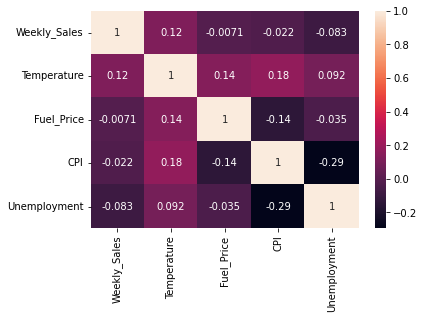

In [ ]:
correlation = walmart[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
sns.heatmap(correlation,annot=True)

- Theres is no such conclusion about atributes and sales
- Unemploymet is the top positive correlation to sales found

## Evaluation

Through the previous analyses it's possible to conclude:


*   Stores 20, 4, 14, 13, 2, 10, 27, 6, 1 have the best mean store sales, in this specific order
*   The top store (20) overpass 11/33 (33%) times the store_mean_sale
*   The second store (4) overpass 11/33 (33%) times the store_mean_sale
*   The third store (14) overpass 13/33 (40%) times the store_mean_sale
*   Store 14 has the top mean sales (without hollidays sales) 
*   Stores 3, 5, 30, 33, 36, 37, 38, 42, 43, 44 are not superior outliers, that is, no historic of sales increase
*   Stores 40, 35, 8, 17, 45, 21, 25, 15, 7, 9, 29, 16 are bellow the walmart_mean_sale



## Conclusion

* The top store to expand is the Store 14.
* It has margin to expand and more stability at non hollidays season